#COVID
<font color='orange'>**If you attended the class in person, please don't forget to fill in [this form](https://docs.google.com/forms/d/e/1FAIpQLSfA7p1lxOhaXLw_2jO1OBvOzqheS0kjzm968S4uciXQKh5__g/viewform)**

# Introduction to supervised learning 

Let's practice the material that was discussed during the lecture. Please, make a copy of this colaboratory in order to be able to make changes **(File -> Save a copy in Drive)**.

## Homework #1

This colaboratory also contains Homework #1 of the Machine Learning course, which is due **September 20, Sunday, midnight (23:59 EET time)**. To complete the homework, extract **(File -> Download .ipynb)** and submit to the course webpage.

**NB! Links to your colaboratory will not be accepted as a solution!**

##List of Homework's exercises:
1. [EX1](#scrollTo=tz9XASPxeqDC) - 2 points
2. [EX2](#scrollTo=X2xsOtQCuHla&line=1&uniqifier=1) - 2 points
3. [EX3](#scrollTo=1YXt-Gxw9UY7&line=1&uniqifier=1) - 2 points
4. [EX4](#scrollTo=7p4GMeGK-QGL&line=1&uniqifier=1) - 1 points
5. [EX5](#scrollTo=nqV2c5sDc_f2&line=2&uniqifier=1) - 3 points
6. [Bonus 1](#scrollTo=_2T9ydozzcb-&line=3&uniqifier=1) - 2 points
7. [Bonus 2](#scrollTo=UkOtofaRjH8P&line=1&uniqifier=1) - up to 5 points

## Introducing Colaboratory (Colab)
**Colaboratory**, is a great tool created by Google for individuals interested in getting a hands-on experience with Machine Learning (including Deep Learning). It offers a free CPU/**GPU** quota and a preconfigured virtual machine instance set up for to run Tensorflow and Keras libraries using a Jupyter notebook instance. **In one sentence, it is a perfect “getting started” point for experimentation with neural networks for any part-time hobbist or computer nerd**.

*Introductory text by Oleg Żero (https://zerowithdot.com/colab-workspace/).*


In [ ]:
!ls

sample_data


In [ ]:
print("Hello world !")

Hello world !


## Classification with KNN on MNIST
We shall use classical MNIST dataset to practice one of the simplest machine learning algorithms - Nearest Neighbour algorithm and its extension - K-Nearest Neighbour algorithm. MNIST stands for Mixed National Institute of Standards and Technology and contains almost 55000 small square 28×28 pixel grayscale images of digits from 0 to 9. Let's load it!

### Setup: 
Here we will load necessary libraries (NumPy and Pandas) and MNIST dataset 

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore', category = RuntimeWarning)

import os

# old school TF
%tensorflow_version 1.x

# Supress warnings by TF 1.x
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR) # credit to Dmitry Lekhovitsky

from tensorflow.examples.tutorials.mnist import input_data

TensorFlow 1.x selected.


In [ ]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=False)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [ ]:
!ls

MNIST_data  sample_data


We check the dimensionality of the downloaded images:

In [ ]:
images = np.vstack([img for img in mnist.train.images])
labels = mnist.train.labels
print(f"images are of shape: {images.shape} and labels: {labels.shape}")

images are of shape: (55000, 784) and labels: (55000,)


### Visualising MNIST

In [ ]:
images[0,:]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

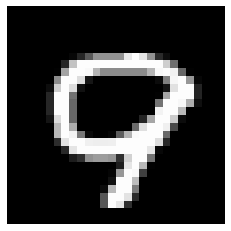

In [ ]:
# Let's resize and plot the first image
img_matrix = images[45,:].reshape((28, 28))
plt.imshow(img_matrix, plt.get_cmap('gray'));
plt.axis('off')
plt.show()

What is the label of this image?

In [ ]:
print (f"Correct label of the first image is: {labels[94]}")

Correct label of the first image is: 2


### Subsampling

Although, in practice you typically want to use as much data as possible to train your models, large datasets are not very suitable for experimenting and visualization -- it is just too annoying to have to wait minutes for each step to continue. Thus, 55000 examples is a bit too much for our purposes, so why not to sample just 2000.

In [ ]:
train_images = images[0:2000,:]
train_labels = labels[0:2000]

test_images = images[2000:3000,:]
test_labels = labels[2000:3000]

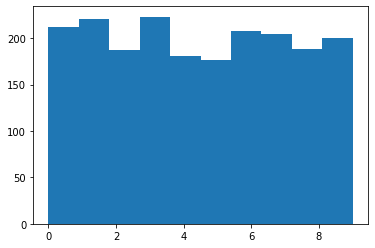

In [ ]:
# We should make sure that the distribution is more or less uniform across our samples
plt.hist(train_labels);

Let's see some more examples from all classes.

i; 0 idx; 398 idxs; [ 398    7   10 1960  729 1502  196]
i; 1 idx; 7 idxs; [ 398    7   10 1960  729 1502  196]
i; 2 idx; 10 idxs; [ 398    7   10 1960  729 1502  196]
i; 3 idx; 1960 idxs; [ 398    7   10 1960  729 1502  196]
i; 4 idx; 729 idxs; [ 398    7   10 1960  729 1502  196]
i; 5 idx; 1502 idxs; [ 398    7   10 1960  729 1502  196]
i; 6 idx; 196 idxs; [ 398    7   10 1960  729 1502  196]
i; 0 idx; 630 idxs; [ 630 1834  516 1110 1530 1793 1575]
i; 1 idx; 1834 idxs; [ 630 1834  516 1110 1530 1793 1575]
i; 2 idx; 516 idxs; [ 630 1834  516 1110 1530 1793 1575]
i; 3 idx; 1110 idxs; [ 630 1834  516 1110 1530 1793 1575]
i; 4 idx; 1530 idxs; [ 630 1834  516 1110 1530 1793 1575]
i; 5 idx; 1793 idxs; [ 630 1834  516 1110 1530 1793 1575]
i; 6 idx; 1575 idxs; [ 630 1834  516 1110 1530 1793 1575]
i; 0 idx; 110 idxs; [ 110 1860 1639 1327 1743   16 1771]
i; 1 idx; 1860 idxs; [ 110 1860 1639 1327 1743   16 1771]
i; 2 idx; 1639 idxs; [ 110 1860 1639 1327 1743   16 1771]
i; 3 idx; 1327 idxs; [ 11

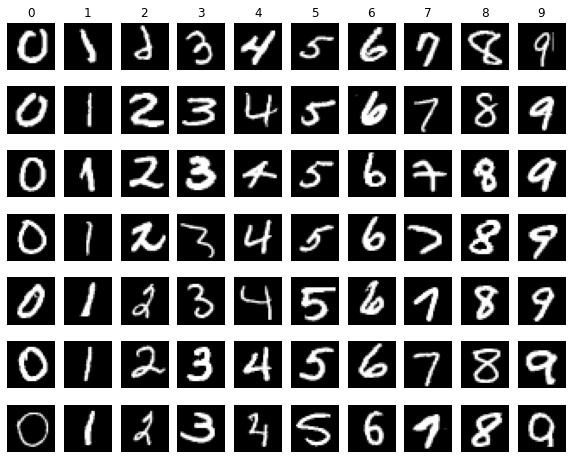

In [ ]:
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
# "Names" of classes:
classes =  ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

num_classes = len(classes)
samples_per_class = 7 # Number of images from each class we want to see
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(train_labels == y)
    #print(idxs)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    #print(idxs)
    for i, idx in enumerate(idxs):
        print("i;",i,"idx;",idx,"idxs;",idxs)
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(train_images[idx].reshape((28, 28)), plt.get_cmap('gray'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

**Classroom exercise**: Let's define a distance function, let it be Eucledian distance (L2)

In [ ]:
#(x1, x2) (y1, y2)
np.sqrt((x1-y2)**2 + (x2-y2)**2)

NameError: ignored

In [ ]:
#img1 and img2 [:784]
np.sqrt(np.sum(img1-img2)**2)

NameError: ignored

In [ ]:
def dist(img1, img2):
  ##### YOUR CODE STARTS #####
  return(np.sqrt(np.sum((img1 - img2)**2)))
  ##### YOUR CODE ENDS ##### (please do not delete this line)

Check the validity of the function here:

In [ ]:
print(f"Distance between first two images is {dist(train_images[0], train_images[1])} and should be about 11.858")

Distance between first two images is 11.85839557647705 and should be about 11.858


You can play with the defined function below. Check that the distance between images of the same digit is typically smaller than the distance between images of different digits.

In [ ]:
print(f"Distance between image with a class {train_labels[1]} and class {train_labels[3]} is {dist(train_images[1], train_images[3])}")
print(f"Distance between image with a class {train_labels[1]} and class {train_labels[11]} is {dist(train_images[1], train_images[11])}")

Distance between image with a class 3 and class 6 is 10.872645378112793
Distance between image with a class 3 and class 3 is 8.07426929473877


Now the actual algorithm. It consists of three steps.

1. Compute distances to all points in the dataset
2. Find the closest point, and 
3. Report the corresponding label.

**Classroom exercise**: Implement the three steps.

We shall do it gently. First we pick a sample image that we will be classifying. Let us say that the first image from the `test_images` is an unknown image sent by our friend:

In [ ]:
test_image = test_images[0]
test_label = test_labels[0]

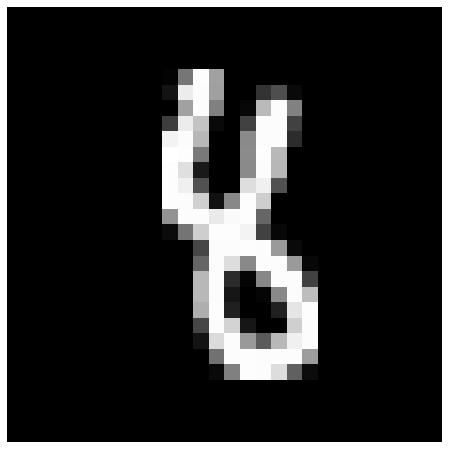

In [ ]:
img_matrix = test_image.reshape((28, 28))
plt.imshow(img_matrix, plt.get_cmap('gray'));
plt.axis('off')
plt.show()

**Classroom exercise:** compute all distances from the `test_image` to the `train_images` in the dataset

In [ ]:
dist(test_image, train_images[5])

10.036598

In [ ]:
##### YOUR CODE STARTS #####
#TODO
all_distances = [dist(test_image, train_image) for train_image in train_images]
##### YOUR CODE ENDS ##### (please do not delete this line)
all_distances[0:5]

[10.115574, 9.505396, 9.084774, 9.745117, 8.398525]

Now let's find out which image is closest to our `test_image`

In [ ]:
i = np.argmin(all_distances)

Almost done, now report a label with index `i` in `train_labels`

In [ ]:
predicted_label = train_labels[i]

Compare it to the true label of the first image in the `train_labels`

In [ ]:
print(f"Predicted class for the first image is {predicted_label} and the true label is {test_label}")

Predicted class for the first image is 8 and the true label is 8


Here we can visualise the nearest in terms of the Eucledian distance image from the `train_images`

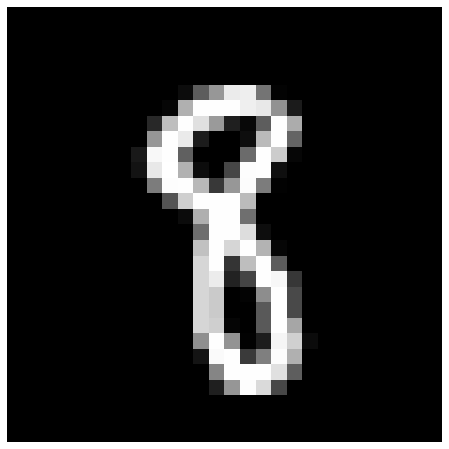

In [ ]:
img_matrix = train_images[i,:].reshape((28, 28))
plt.imshow(img_matrix, plt.get_cmap('gray'));
plt.axis('off')
plt.show()

**Classroom exercise:** Now we should make a function out of the code we have already written. 

In [ ]:
def classify(image):
  ##### YOUR CODE STARTS #####
  all_distances = [dist(image, candidate_image) for candidate_image in train_images]
  prediction = train_labels[np.argmin(all_distances)]
  ##### YOUR CODE ENDS ##### (please do not delete this line)
  return prediction

Let's test this function to verify that it works

In [ ]:
x = 45
print(f"Predicted class for the first image is {classify(test_images[x])} and the true label is {test_labels[x]}")

Predicted class for the first image is 4 and the true label is 4


One very popular variation of Nearest Neighbour is K-nearest neighbour. In this algorithm a label for a new instance is chosen by majority vote by **`k`** of its nearest neighbors. 

The actual algorithm is not very different from vanila nearest neighbour:

1. Compute distances to all points in the dataset
2. Find the **`k`** closest points (you may consider using `np.argsort` function)
3. Report the most popular label from these **`k`**. (maybe `np.bincount` can help)

## Homework exercise 1 (2 points): KNN

<font color='red'>**(Homework exercise 1- a)** Implement the aformentioned algorithm in the cell below (1.5 point)</font>

In [ ]:
def classify_knn(image, k):
  ##### YOUR CODE STARTS #####
  all_distances = [dist(image, candidate_image) for candidate_image in train_images]

  #Find the k closest points
  #print(all_distances[0:k])
  #np.argsort(all_distances)
  #print(np.argsort(all_distances)[0:k])
  #i = np.argmin(all_distances)
  #print(i," + ",all_distances[i])

  #Find the label
  #print(f"The",k,"nearest points are :" ,train_labels[np.argsort(all_distances)[0:k]])

  #Find the most popular label
  prediction = np.argmax(np.bincount(train_labels[np.argsort(all_distances)[0:k]]))
  ##### YOUR CODE ENDS ##### (please do not delete this line)
  return prediction

Test the function on `test_image`:

In [ ]:
print(f"Predicted class for the first image using classify_knn is {classify_knn(test_image, 10)} and the true label is {test_label}")

Predicted class for the first image using classify_knn is 8 and the true label is 8


<font color='red'>**(Homework exercise 1- b)** Modify the function `classify_knn` adding a print statement that outputs labels of K nearest labels. Report 10 nearest neighbours  for the `test_image`. Explain its output in the cell below. (0.5 points) </font>

 ***Answer* to (b):**
If we print out labels of the K nearest points, we got this : [8 8 8 8 5 4 8 8 8 5]

There are seven 8, two 5 and one 4 ; so 8 is the most popular label and our prediction is based on that.


Seems like Nearest Neighbor works, indeed! Apply it to all 1000 test images and then estimate it's effectivness.

**Classroom exercise:** Classify all test images and store them into a separate variable `test_predicted`, choose `k` = 10. **NB, don't forget to uncomment all print statements inside the function!**

In [ ]:
classify_knn(test_image, 10)

8

In [ ]:
test_predicted_knn = [classify_knn(image, 10) for image in test_images]
test_predicted = [classify(image) for image in test_images]

In [ ]:
print(test_predicted)
print(test_predicted_knn)

[8, 7, 4, 0, 0, 2, 9, 1, 6, 9, 4, 9, 0, 9, 2, 6, 4, 7, 0, 4, 1, 8, 1, 9, 5, 0, 8, 1, 7, 2, 3, 3, 5, 7, 6, 8, 9, 0, 0, 1, 1, 2, 8, 3, 5, 4, 3, 5, 8, 6, 0, 8, 0, 9, 7, 0, 9, 1, 2, 7, 1, 9, 0, 6, 6, 3, 0, 3, 5, 9, 9, 9, 2, 5, 1, 1, 5, 9, 1, 2, 5, 5, 2, 4, 1, 7, 6, 9, 2, 1, 4, 5, 7, 2, 9, 6, 6, 8, 9, 7, 9, 1, 6, 5, 6, 1, 3, 2, 9, 6, 9, 6, 5, 7, 5, 8, 1, 8, 9, 1, 4, 8, 8, 3, 4, 7, 6, 0, 0, 0, 0, 1, 5, 5, 5, 0, 3, 5, 1, 2, 0, 8, 3, 0, 5, 4, 0, 3, 9, 1, 3, 8, 4, 2, 5, 9, 3, 9, 0, 5, 1, 2, 3, 6, 0, 5, 4, 7, 6, 1, 2, 9, 3, 7, 7, 1, 1, 2, 4, 6, 9, 0, 8, 0, 8, 1, 9, 2, 1, 8, 8, 4, 2, 5, 9, 6, 2, 7, 9, 1, 9, 9, 6, 0, 4, 1, 6, 2, 9, 3, 7, 4, 6, 7, 3, 9, 5, 7, 8, 0, 6, 1, 1, 2, 6, 9, 1, 1, 8, 9, 6, 9, 5, 1, 1, 5, 7, 1, 8, 9, 1, 9, 0, 0, 5, 9, 5, 0, 4, 5, 3, 9, 9, 1, 0, 7, 4, 2, 9, 2, 5, 3, 2, 3, 4, 2, 2, 0, 6, 9, 6, 0, 0, 6, 9, 1, 3, 7, 7, 5, 4, 0, 9, 3, 7, 4, 0, 9, 3, 6, 8, 6, 2, 3, 6, 3, 9, 8, 6, 1, 9, 7, 5, 1, 7, 0, 7, 8, 1, 7, 9, 5, 9, 3, 7, 1, 8, 1, 0, 4, 8, 5, 3, 5, 1, 0, 2, 4, 8, 1, 1, 7, 3, 

In [ ]:
print("With the nearest point, we have",np.sum(test_labels == test_predicted),"correct predictions")
print("With the k point, we have",np.sum(test_labels == test_predicted_knn),"correct predictions")

With the nearest point, we have 882 correct predictions
With the k point, we have 863 correct predictions


How many instances from the test set the classifier has predicted correctly?

In [ ]:
n_correct = np.sum(test_labels == test_predicted)
print(f"Number of correctly predicted images is {n_correct}")

Number of correctly predicted images is 882


Now we will use **`accuracy`** (namely, proportion of correctly guessed classes) to estimate the performance of our nearest neighbor classifier. For that we need to divide number of correctly predicted images by total number of images.

In [ ]:
nn_accuracy = n_correct/len(test_labels)
print(f"Final accuracy of our nearest neighbor classifier is {nn_accuracy}. Not bad!")

Final accuracy of our nearest neighbor classifier is 0.882. Not bad!


Let's examine some of the missclassified examples.


This image with 5 was incorrectly predicted as 3


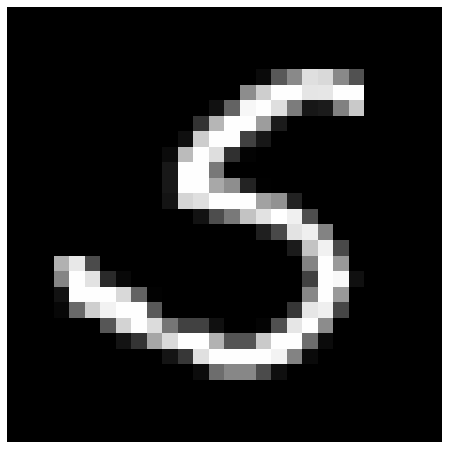

In [ ]:
missclassified = np.where(test_predicted != test_labels)[0]

# Set an index of missclassified instance you want to examine
index = 50

# Plot this instance as usual
img_matrix = test_images[missclassified[index]].reshape((28, 28))
plt.imshow(img_matrix, plt.get_cmap('gray'))
plt.axis('off')
print(f"This image with {test_labels[missclassified[index]]} was incorrectly predicted as {test_predicted[missclassified[index]]}")

## Homework exercise 2 (2 points): exploring misclassified examples

<font color='red'>**(Homework exercise 2- a)** Modify the visualisation code that we used to visualise a grid of example images from different classes. Instead of random examples for each class, visualise misclassified examples from each class. For example, in the first column visualise images that had true label `0` but were classified as something else, in the second column, show examples of images that had label `1` but were misclassified into another class and so on. Add a title to each small image, in the following format `true_label, predicted_label`. (1.5 points)</font>

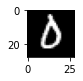

This image was a 0 but was incorrectly predicted as 3
*******************************************
There is no misclassified for this class : 1
*******************************************


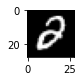

This image was a 2 but was incorrectly predicted as 0
*******************************************


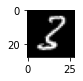

This image was a 3 but was incorrectly predicted as 2
*******************************************


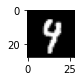

This image was a 4 but was incorrectly predicted as 9
*******************************************


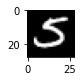

This image was a 5 but was incorrectly predicted as 3
*******************************************


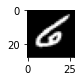

This image was a 6 but was incorrectly predicted as 5
*******************************************


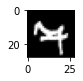

This image was a 7 but was incorrectly predicted as 4
*******************************************


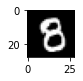

This image was a 8 but was incorrectly predicted as 6
*******************************************


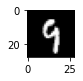

This image was a 9 but was incorrectly predicted as 4
*******************************************


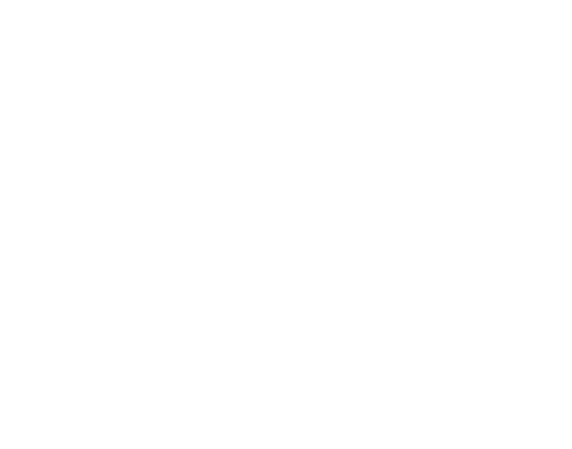

[1, 0, 11, 22, 18, 14, 1, 10, 28, 13]


In [ ]:
missclassified = np.where(test_predicted != test_labels)[0]

# Plot this instance as usual
"""
index = 60
img_matrix = test_images[missclassified[index]].reshape((28, 28))
img_matrix = test_images[missclassified[index]].reshape((28, 28))
print(test_labels[missclassified[index]])
plt.imshow(img_matrix, plt.get_cmap('gray'))
plt.axis('off')
print(f"This image was a {test_labels[missclassified[index]]} but was incorrectly predicted as {test_predicted[missclassified[index]]}")
"""

plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
# "Names" of classes:
classes =  ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

num_classes = len(classes)
samples_per_class = 1 # Number of images from each class we want to see
equality_in_class = []
for y, cls in enumerate(classes):
    ##### YOUR CODE STARTS #####
    #print(y)
    #print(test_labels[missclassified])
    idxs = np.flatnonzero(test_labels[missclassified] == y)
    equality_in_class.append(idxs.size)
    
    #print("idxs:", idxs)
    if(idxs.size == 0):
      print("There is no misclassified for this class :",y)
      print("*******************************************")
    #print(idxs[0])
    #idxs = np.random.choice(idxs, samples_per_class, replace=False)
    else:

    #SHOW IMAGES
    #print("i;",i,"idx;",idx,"idxs;",idxs)
      idx = idxs[0]
      #plt_idx = i * num_classes + y + 1
      plt.subplot(samples_per_class, num_classes, y+1)
      plt.imshow(test_images[missclassified[idx]].reshape((28, 28)), plt.get_cmap('gray'))
      plt.show()
      plt.axis('off')
      print(f"This image was a {test_labels[missclassified[idx]]} but was incorrectly predicted as {test_predicted[missclassified[idx]]}")
      print("*******************************************")

    ##### YOUR CODE ENDS ##### (please do not delete this line)
plt.show()
print(equality_in_class)


<font color='red'>**(Homework exercise 2- b)** What is your take away from this figure? Are all classes equally missclassified? Why? Are there any classes that KNN confuses more often, why? (0.5 points) </font>

Answer to (b): In order to see if all classes equally misclassified, we add the array "equality_in_class" to see how misclassified labels are organized. We have this output : 
[1, 0, 11, 22, 18, 14, 1, 10, 28, 13]
So there is one class "0" who is misclassified, zero "1", eleven "2", etc...

We clearly see that "0","1" and "6" are non often misclassified if we compare to others labels. "8" is the most often misclassified.




```
# Ce texte est au format code
```

### Scikit-learn

Now let us use the Scikit-Learn package to train the Nearest Neigbor classifier.

Most of the models that we are going to use are implemented in scikit-learn, for example KNN is available under the name `KNNeiborsClassifier`. All you need to do is to import it from `sklearn` (this a short name for scikit-learn).

In [ ]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier

Let's create an instance of the KNN classifier by calling a `KNeighborsClassifier()` function. As an input parameter you can specify `k`. For example 10 nearest neighbour classifier is created like this:

In [ ]:
model = KNeighborsClassifier(n_neighbors = 10)

Most of the scikit-learn models have method `fit` that let you train the classifier given training instances and correct labels:

In [ ]:
model.fit(train_images, train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

**Classroom exercise:** Use trained nearest neighbor classifier (`model`) to predict `test_images` and then calculate the accuracy. How does it compare to the one we obtained in the class?

In [ ]:
##### YOUR CODE STARTS #####
test_predicted = model.predict(test_images)
n_correct = np.sum(test_labels == test_predicted)
##### YOUR CODE ENDS ##### (please do not delete this line)
print(f"Number of correctly predicted images is {n_correct}")

Number of correctly predicted images is 863


More negbhours not always cool

---



# Regression

## Small 2D example

Here we will create a small toy dataset for playing around with some regression algorithms.

In [ ]:
import numpy as np 
import pandas as pd

example_data = pd.DataFrame({'distance':[1,2,3,4,5], 'fare_amount':[2,4,5,4,5]})

You can access columns using `.` notation and name of the column, e.g.:

In [ ]:
example_data.fare_amount
#we can use also this :
#example_data["distance"]

0    2
1    4
2    5
3    4
4    5
Name: fare_amount, dtype: int64

The following is our attempt to reproduce figures exactly as in lecture slides. Never mind, you will be able to use regular `matplotlib` as before if you like.

In [ ]:
# Plotting as in ggplot2
!pip install plotnine
from plotnine import *

   distance  fare_amount
0         1            2
1         2            4
2         3            5
3         4            4
4         5            5


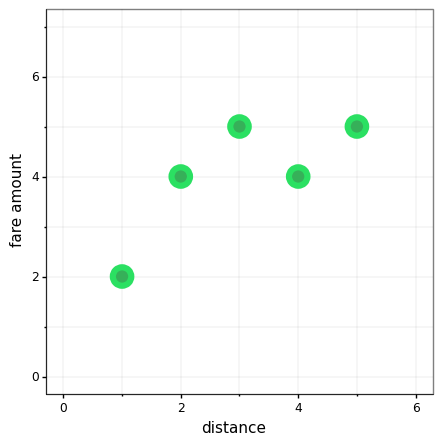

<ggplot: (-9223363247668937479)>

In [ ]:
print(example_data)
fig = (
    ggplot(data = example_data,
          mapping = aes(x = 'distance', y = 'fare_amount')) +
    geom_point(fill = '#36B059', 
               size = 5.0,
               stroke = 2.5,
               colour = '#2BE062',
               shape = 'o') +
    labs(
        title ='',
        x = 'distance',
        y = 'fare amount',
    ) +
    xlim(0, 6) +
    ylim(0, 7) +
    theme_bw() + 
    theme(figure_size = (5, 5),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black'))
)
fig

### Linear regression on a toy example
**Classroom exercise**: find value of **`intercept`** and **`slope`** (`w1`) using the equation of the line (`y = intercept + slope*x`) and lecture slides. Remember that in this example `x` is `distance` and `y` is `fare_amount`.

In [ ]:
#(x-mean(x))
x = example_data.distance
#NUMPY WAY
x - np.mean(x)
#PANDA WAY
x - x.mean()

0   -2.0
1   -1.0
2    0.0
3    1.0
4    2.0
Name: distance, dtype: float64

In [ ]:
x = example_data.distance
y = example_data.fare_amount
#NUMPY SUM (np.sum())
#PANDA SUM (xxxxxx.sum())
((x - x.mean())*(y - y.mean())).sum()

6.0

In [ ]:
(((x - x.mean())**2).sum())

10.0

In [ ]:
(((x - x.mean())*(y - y.mean())).sum())/((((x - x.mean())**2).sum()))

0.6

In [ ]:
##### YOUR CODE STARTS #####
w1 = (((x - x.mean())*(y - y.mean())).sum())/((((x - x.mean())**2).sum()))
intercept = example_data.fare_amount.mean() - w1*example_data.distance.mean()
##### YOUR CODE ENDS ##### (please do not delete this line)
print(f"w1 = {w1}; intercept = {intercept}, while the correct values are w1 = 0.6 and intercept = 2.2")

w1 = 0.6; intercept = 2.2, while the correct values are w1 = 0.6 and intercept = 2.2


We can now plug in these coefficients to visually examine regression line that we have computed

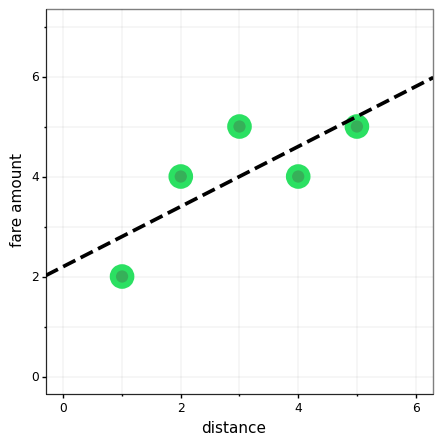

<ggplot: (8789193374756)>

In [ ]:
fig + geom_abline(intercept = intercept, slope = w1, color="black", linetype="dashed", size=1.5)

We can compare our regression line with a regression line computed by Python

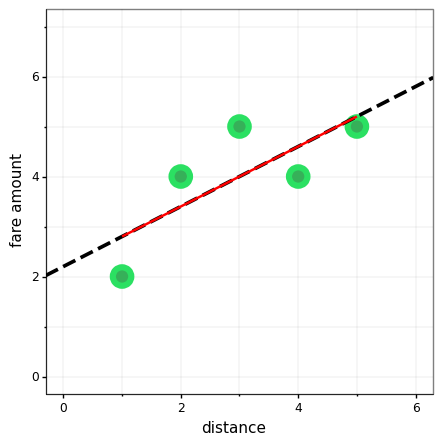

<ggplot: (8789185942066)>

In [ ]:
fig + geom_abline(intercept = intercept, slope = w1, color="black", linetype="dashed", size=1.5) + geom_smooth(method = 'lm', se = False, colour = 'red')

### Decision tree (DT) algorithm
We will borrow DT algorithm from sklearn package as linear regression. Sklearn has both `DecisionTreeRegressor` and `DecisionTreeClassifier` at its disposal. For now, let's use regressor.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(max_depth = 1)

we use function `fit` to train newly created DT instance on our `example_data`

In [ ]:
dtr.fit(X = np.array(example_data.distance).reshape(-1, 1), y = example_data.fare_amount)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=1,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

### Creating a synthetic test set that would cover up the whole space

In [ ]:
test_data = pd.concat([pd.DataFrame({'distance': np.repeat(x, 71), 'fare_amount': np.linspace(start=0, stop=7, num=71)}) for x in np.linspace(start=0, stop=6, num=61)])
test_data.head()

,distance,fare_amount
0,0.0,0.0
1,0.0,0.1
2,0.0,0.2
3,0.0,0.3
4,0.0,0.4


In [ ]:
test_data['predicted_amount'] = dtr.predict(np.array(test_data.distance).reshape(-1, 1))
print(test_data['predicted_amount'])

0     2.0
1     2.0
2     2.0
3     2.0
4     2.0
     ... 
66    4.5
67    4.5
68    4.5
69    4.5
70    4.5
Name: predicted_amount, Length: 4331, dtype: float64


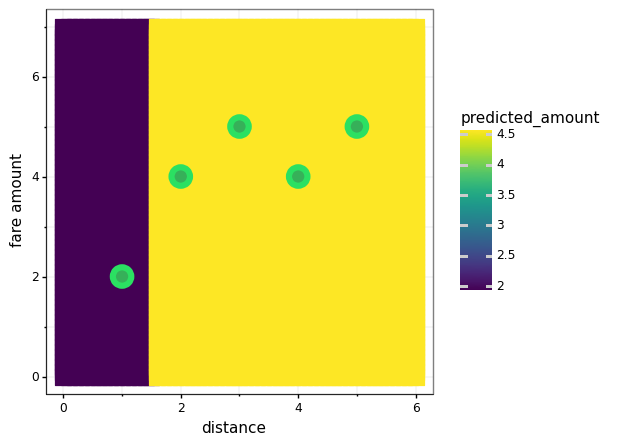

<ggplot: (8789169211519)>

In [ ]:
fig = (
    ggplot(data = example_data,
          mapping = aes(x = 'distance', y = 'fare_amount')) +
    geom_point(data = test_data, mapping = aes(x = 'distance', y = 'fare_amount', size = 5.0, colour = 'predicted_amount'), shape = 's') +
    geom_point(fill = '#36B059', 
               size = 5.0,
               stroke = 2.5,
               colour = '#2BE062',
               shape = 'o') +
    labs(
        title ='',
        x = 'distance',
        y = 'fare amount',
    ) +
    xlim(0, 6) +
    ylim(0, 7) +
    theme_bw() + 
    theme(figure_size = (5, 5),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black')) + 
    guides(size = False)
)
fig

## Homework exercise 3 (2 points): visualising linear regression



<font color='red'>**(Homework exercise 3- a)** use previously computed coefficients `w1` and `intercept` of the linear regression model to predict the fare amount in the `test_data` (1 point)

In [ ]:
##### YOUR CODE STARTS #####
x = example_data.distance
y = example_data.fare_amount
w1 = (((x - x.mean())*(y - y.mean())).sum())/((((x - x.mean())**2).sum()))
intercept = example_data.fare_amount.mean() - w1*example_data.distance.mean()

lr.fit(X = np.array(x).reshape(-1, 1), y = example_data.fare_amount)
test_data = pd.concat([pd.DataFrame({'distance': np.repeat(x, 71), 'fare_amount': np.linspace(start=0, stop=7, num=71)}) for x in np.linspace(start=0, stop=6, num=61)])

test_data['predicted_amount'] = intercept + w1*test_data.distance
print(test_data['predicted_amount'])
##### YOUR CODE ENDS ##### (please do not delete this line)

0     2.2
1     2.2
2     2.2
3     2.2
4     2.2
     ... 
66    5.8
67    5.8
68    5.8
69    5.8
70    5.8
Name: predicted_amount, Length: 4331, dtype: float64


<font color='red'>**(Homework exercise 3- b)** visualise these predictions as well as linear regression line the way we have done it for Decision Tree. Explain the results. (0.5 points)
</font>

0     2.2
1     2.2
2     2.2
3     2.2
4     2.2
     ... 
66    5.8
67    5.8
68    5.8
69    5.8
70    5.8
Name: predicted_amount, Length: 4331, dtype: float64


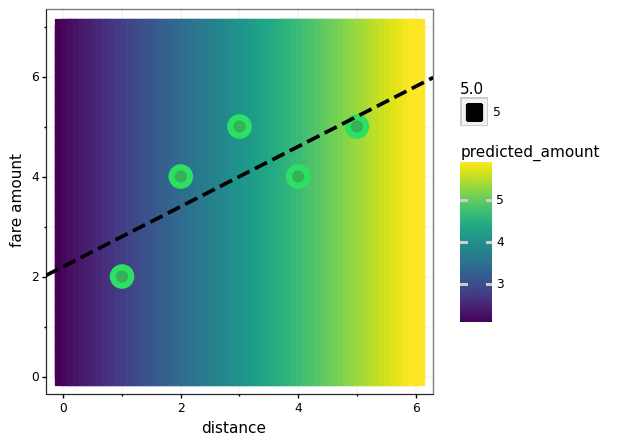

<ggplot: (8789185939299)>

In [ ]:
##### YOUR CODE STARTS #####
from sklearn.linear_model import LinearRegression
lr = LinearRegression() #initialise the model
lr.fit(X = np.array(example_data.distance).reshape(-1, 1), y = example_data.fare_amount)
test_data = pd.concat([pd.DataFrame({'distance': np.repeat(x, 71), 'fare_amount': np.linspace(start=0, stop=7, num=71)}) for x in np.linspace(start=0, stop=6, num=61)])

test_data['predicted_amount'] = lr.predict(np.array(test_data.distance).reshape(-1, 1))
print(test_data['predicted_amount'])

fig = (
    ggplot(data = example_data,
          mapping = aes(x = 'distance', y = 'fare_amount')) +
    geom_point(data = test_data, mapping = aes(x = 'distance', y = 'fare_amount', size = 5.0, colour = 'predicted_amount'), shape = 's') +
    geom_point(fill = '#36B059', 
               size = 5.0,
               stroke = 2.5,
               colour = '#2BE062',
               shape = 'o') +
    labs(
        title ='',
        x = 'distance',
        y = 'fare amount',
    ) +
    xlim(0, 6) +
    ylim(0, 7) +
    theme_bw() + 
    theme(figure_size = (5, 5),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black'))
)
fig
##### YOUR CODE ENDS ##### (please do not delete this line)

<font color='red'>**(Homework exercise 3- c)** Interpret the resulting figure (what is going on there?). (0.5 points)
</font>


Answer to (c): We see on the figure above that the coulor make a regression (from blue to yellow). This is the predicted value. Unlike the decision tree, when you have two splits well defined, it's here a continous regression.


## NYC Taxi dataset
Next we will work with real-world dataset collected from taxis operating in New York City

In [ ]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

link = 'https://drive.google.com/file/d/1XBBNQ6wnaz5W-h8qbL-2_4MNchGR8YCI' # The shareable link

In [ ]:
downloaded = drive.CreateFile({'id':'1XBBNQ6wnaz5W-h8qbL-2_4MNchGR8YCI'}) 
downloaded.GetContentFile('nyc_data.zip')

In [ ]:
# check that nyc_data.zip exists
!ls

adc.json  MNIST_data  nyc_data.zip  sample_data


In [ ]:
# After archive has been downloaded
# unzip it
!unzip nyc_data.zip

# check that train_2M.csv, test.csv, model.pickle and sample_submission.csv exist
!ls

Archive:  nyc_data.zip
  inflating: train_2M.csv            
  inflating: test.csv                
   creating: __MACOSX/
  inflating: __MACOSX/._test.csv     
  inflating: model.pickle            
  inflating: sample_submission.csv   
  inflating: __MACOSX/._sample_submission.csv  
adc.json  MNIST_data	nyc_data.zip  sample_submission.csv  train_2M.csv
__MACOSX  model.pickle	sample_data   test.csv


* `train_2M.csv` contains 2 million observations from NYC dataset (6 independent variables and fare_amount that we need to predict).
* `test.csv` contains new observations, for which we have to estimate `fare_amount` based on train data.
* `sample_submission.csv` - a sample submission file in the correct format (columns `key` and `fare_amount`). Every row in this file matches every row in `test.csv`.
* `model.pickel` - file that contains trained model saved as a pickle (we are going to deal with it later)

### Setting up Kaggle

You need to have an account on Kaggle.com. Before you proceed you need to create **a new API token** at Kaggle.com (your account page). Download the kaggle.json file and fill in the **key** and your username in the code below.

In [436]:
"!mkdir .kaggle

mkdir: cannot create directory ‘.kaggle’: File exists


In [437]:
import json
token = {"username":"victorrq","key":"bf0711d476b5acc7215498fcca0b91dd"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [438]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

In [439]:
!kaggle config set -n path -v{/content}

- path is now set to: {/content}


In [440]:
!chmod 600 ~/.kaggle/kaggle.json

In order to sign up for a NYC Taxi competition you need to accept the rules by cliking on "Late submission" button in the upper right corner: https://www.kaggle.com/c/new-york-city-taxi-fare-prediction

Make a test submission to ensure that the submission mechanism works

In [441]:
!kaggle competitions submit -c new-york-city-taxi-fare-prediction -f sample_submission.csv -m "Sample submission test"

100% 335k/335k [00:00<00:00, 825kB/s]
Successfully submitted to New York City Taxi Fare Prediction

Now you can check `My submissions` tab on the website: https://www.kaggle.com/c/new-york-city-taxi-fare-prediction/submissions

## Read in the NYC data

In [ ]:
%%time 

# note that we use only 1M out of 2M records
train =  pd.read_csv('train_2M.csv', parse_dates=["pickup_datetime"], nrows = 1_000_000) # the first row will automatically be interpreted as a header

CPU times: user 1.57 s, sys: 131 ms, total: 1.7 s
Wall time: 1.7 s


## Brief Exploratory Data Analysis (EDA)

In [ ]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1


In [ ]:
train.dtypes

fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
dtype: object

In [ ]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1000000.000000,1000000.000000,1000000.000000,999990.000000,999990.000000,1000000.000000
mean,11.348079,-72.526640,39.929008,-72.527860,39.919954,1.684924
std,9.822090,12.057937,7.626154,11.324494,8.201418,1.323911
min,-44.900000,-3377.680935,-3116.285383,-3383.296608,-3114.338567,0.000000
25%,6.000000,-73.992060,40.734965,-73.991385,40.734046,1.000000
50%,8.500000,-73.981792,40.752695,-73.980135,40.753166,1.000000
75%,12.500000,-73.967094,40.767154,-73.963654,40.768129,2.000000
max,500.000000,2522.271325,2621.628430,45.581619,1651.553433,208.000000


In [ ]:
def add_travel_vector_features(df):
    df['abs_diff_longitude'] = (df.dropoff_longitude - df.pickup_longitude).abs()
    df['abs_diff_latitude'] = (df.dropoff_latitude - df.pickup_latitude).abs()

add_travel_vector_features(train)

In [ ]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_diff_longitude,abs_diff_latitude
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,0.002701,0.009041
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,0.036780,0.070701
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,0.008504,0.010708
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,0.004437,0.024949
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,0.011440,0.015754


Read in test set

In [ ]:
test_df = pd.read_csv('test.csv')
test_df.dtypes

key                   object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [ ]:
add_travel_vector_features(test_df)

In [ ]:
print(train.isnull().sum())

fare_amount            0
pickup_datetime        0
pickup_longitude       0
pickup_latitude        0
dropoff_longitude     10
dropoff_latitude      10
passenger_count        0
abs_diff_longitude    10
abs_diff_latitude     10
dtype: int64


In [ ]:
print(f'Old size: {len(train)}')
train = train.dropna(how = 'any', axis = 'rows')
print(f'New size: {len(train)}')

Old size: 1000000
New size: 999990


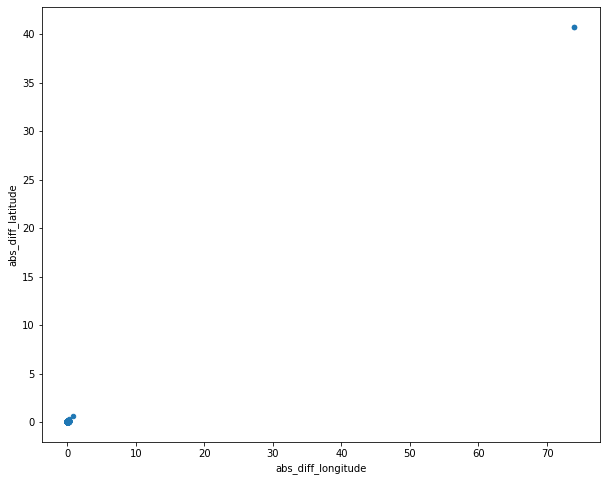

In [ ]:
plot = train.iloc[:2000].plot.scatter('abs_diff_longitude', 'abs_diff_latitude')

In [ ]:
print(f'Old size: {len(train)}')
train = train[(train.abs_diff_longitude < 5.0) & (train.abs_diff_latitude < 5.0)]
print(f'New size: {len(train)}')

Old size: 999990
New size: 998025


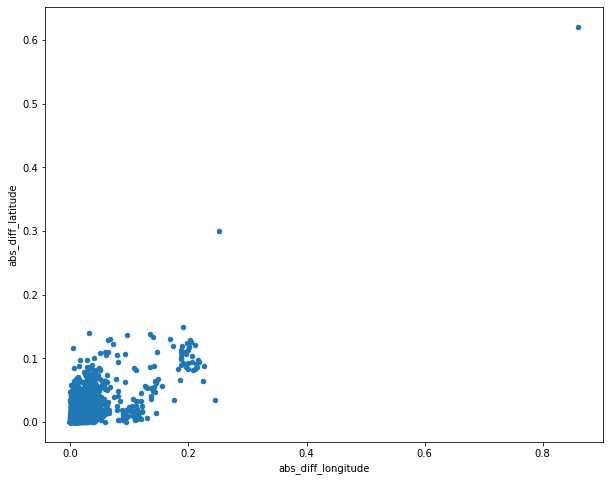

In [ ]:
plot = train.iloc[:2000].plot.scatter('abs_diff_longitude', 'abs_diff_latitude')

### Naive baseline
**Classroom exercise**: what is a reasonable baseline for predicting fare amount (`fare_amount` column in NYC taxi dataset) without knowing anything else?

In [ ]:
train.fare_amount.mean()

11.34121439843731

In [ ]:
##### YOUR CODE STARTS #####
baseline_predictions = np.repeat(train.fare_amount.mean(),test_df.shape[0])
##### YOUR CODE ENDS ##### (please do not delete this line)

In [ ]:
baseline_predictions.shape

(9914,)

In [ ]:
# Write the predictions to a CSV file which we can submit to the competition.
submission = pd.DataFrame(
    {'key': test_df.key, 'fare_amount': baseline_predictions},
    columns = ['key', 'fare_amount'])
submission.to_csv('submission_baseline.csv', index = False)

!ls

adc.json		  MNIST_data	sample_data		 test.csv
linear_regression.pickle  model.pickle	sample_submission.csv	 train_2M.csv
__MACOSX		  nyc_data.zip	submission_baseline.csv


**Classroom exercise**: submit `submission_baseline.csv` to kaggle using earlier example, report RMSE that you get

In [ ]:
##### YOUR CODE STARTS #####
!kaggle competitions submit -c new-york-city-taxi-fare-prediction -f submission_baseline.csv -m "Baseline submission"
##### YOUR CODE ENDS ##### (please do not delete this line)

100% 451k/451k [00:00<00:00, 1.74MB/s]
Successfully submitted to New York City Taxi Fare Prediction

### Linear regression on NYC taxi dataset based on one feature (abs_diff_longitude)

**Classroom exercise**: Use earlier example on 2D data to calculate **`slope`** (`w1`) and **`intercept`** based on **`abs_diff_longitude`**


In [ ]:
##### YOUR CODE STARTS #####
x = train.abs_diff_longitude
y = train.fare_amount

w1 = (((x - x.mean())*(y - y.mean())).sum())/((((x - x.mean())**2).sum()))
intercept = train.fare_amount.mean() - w1*train.abs_diff_longitude.mean()

##### YOUR CODE ENDS ##### (please do not delete this line)
print(f"w1 = {round(w1, 8)}; intercept = {round(intercept, 8)}")

w1 = 179.08616006; intercept = 7.31070345


Instead of calculating coefficients ourselves, we can use sklearn

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train[['abs_diff_longitude']], train[['fare_amount']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Inspecting model object

In [ ]:
dir(lr)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_residues',
 '_set_intercept',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_jobs',
 'normalize',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [ ]:
# Print learnt weights
print(f'[{round(lr.coef_[0][0], 8)}, {round(lr.intercept_[0], 8)}]')

[179.08616006, 7.31070345]


Using earlier example, let's predict `fare_amount` based on calculated coefficients **`intercept`** and **`w1`** and **`test_df.abs_diff_longitude`**.

In [ ]:
predictions_manual = w1*test_df.abs_diff_longitude + intercept

Here is how you can predict `fare_amount` for `test_df` using sklearn object `lr`:

In [ ]:
predictions_sklearn = lr.predict(test_df[['abs_diff_longitude']])

In [ ]:
submission = pd.DataFrame(
    {'key': test_df.key, 'fare_amount': np.squeeze(predictions_sklearn)},
    columns = ['key', 'fare_amount'])
submission.to_csv('submission_lr_2d.csv', index = False)

!ls 

adc.json		  model.pickle		 submission_baseline.csv
linear_regression.pickle  nyc_data.zip		 submission_lr_2d.csv
__MACOSX		  sample_data		 test.csv
MNIST_data		  sample_submission.csv  train_2M.csv


In [ ]:
!kaggle competitions submit -c new-york-city-taxi-fare-prediction -f submission_lr_2d.csv -m "Linear Regression with only abs_diff_longitude as an independent variable"

100% 454k/454k [00:00<00:00, 2.16MB/s]
Successfully submitted to New York City Taxi Fare Prediction

In [ ]:
!head submission_lr_2d.csv

key,fare_amount
2015-01-27 13:08:24.0000002,8.763100513241412
2015-01-27 13:08:24.0000003,9.464022144954694
2011-10-08 11:53:44.0000002,7.8246807272937176
2012-12-01 21:12:12.0000002,8.974055702575015
2012-12-01 21:12:12.0000003,11.343544686361735
2012-12-01 21:12:12.0000005,10.568997044091063
2011-10-06 12:10:20.0000001,9.210628520017996
2011-10-06 12:10:20.0000003,44.52498659500659
2011-10-06 12:10:20.0000002,10.712086885978357


What RMSE you obtained with this model?

## Save/load model using pickle.

In [ ]:
import pickle
import os

pickle_out = open('linear_regression.pickle', 'wb')
pickle.dump(lr, pickle_out)

if os.path.getsize('linear_regression.pickle') > 0:  
    print("file is not empty")

file is not empty


In [ ]:
!ls

adc.json		  model.pickle		 submission_baseline.csv
linear_regression.pickle  nyc_data.zip		 submission_lr_2d.csv
__MACOSX		  sample_data		 test.csv
MNIST_data		  sample_submission.csv  train_2M.csv


In [ ]:
del lr

Now, if you call `lr` you should get an error:

In [ ]:
lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
filename = 'linear_regression.pickle'
with open(filename, 'rb') as file:
  lr = pickle.load(file)

Check that `lr` object has been loaded successfully


In [ ]:
lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lr.get_params

<bound method BaseEstimator.get_params of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)>

## Homework exercise 4 (1 point): read and explore `model.pickel`

<font color='red'> **(Homework exercise 4- a)** read in `model.pickel` file that you have downloaded from `nyc_data.zip` using `pickle.load()` function. (0.5 points)

In [ ]:
##### YOUR CODE STARTS #####
import pickle
import os


filename = 'model.pickle'
with open(filename, 'rb') as file:
  lr = pickle.load(file)

#lr
dir(lr)
##### YOUR CODE ENDS ##### (please do not delete this line)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_residues',
 '_set_intercept',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_jobs',
 'normalize',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

<font color='red'> **(Homework exercise 4- b)** next, explore the object using function `dir` and answer the following questions:
* <font color='red'> Which model was saved into this object?  
* <font color='red'> How many coefficients it has and what are their values?
* <font color='red'>Can you find out which features have been used for training?

<font color='red'>(0.5 points)


Answers to (b): 


*   The model saved is a LinearRegression (we can see this with lr.get_params() or in the dir, we see some coefficient who reminds linearRegression
*   By using "lr.coef_", we see two coefficients : array([146.1216904 ,  89.26772999])
*   By using "get_params(deep=True)" we can see which features have been used for training, and it's : {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}. So, the training data_base was copy_X



### Linear regression based on more than one feature

In [ ]:
lr = LinearRegression()
lr.fit(train[['abs_diff_longitude', 'abs_diff_latitude']], train[['fare_amount']])

# Print learnt weights
print(f'[{round(lr.coef_[0][0], 8)}, {round(lr.coef_[0][1], 8)} , {round(lr.intercept_[0], 8)}]')

[146.1216904, 89.26772999 , 6.17039106]


Predict `fare_amount` for test set and submit predictions to kaggle

In [ ]:
# Predict fare_amount on the test set using our model (w) trained on the training set.
test_y_predictions = lr.predict(test_df[['abs_diff_longitude', 'abs_diff_latitude']])

# Write the predictions to a CSV file which we can submit to the competition.
submission = pd.DataFrame(
    {'key': test_df.key, 'fare_amount': np.squeeze(test_y_predictions)},
    columns = ['key', 'fare_amount'])
submission.to_csv('submission_lr_3d.csv', index = False)

!ls 

adc.json		  nyc_data.zip		   submission_lr_3d.csv
linear_regression.pickle  sample_data		   test.csv
__MACOSX		  sample_submission.csv    train_2M.csv
MNIST_data		  submission_baseline.csv
model.pickle		  submission_lr_2d.csv


In [ ]:
!kaggle competitions submit -c new-york-city-taxi-fare-prediction -f submission_lr_3d.csv -m "Linear Regression with two predictors on 1M records"

100% 454k/454k [00:00<00:00, 2.17MB/s]
Successfully submitted to New York City Taxi Fare Prediction

### Decision Tree (DT)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr= DecisionTreeRegressor(max_depth = 100)
dtr.fit(train[['abs_diff_longitude', 'abs_diff_latitude']], train[['fare_amount']])

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=100,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

How can we predict the goodness of this model without sending it to the server? (Hint: remember RMSE?)

In [ ]:
np.sqrt(np.mean((dtr.predict(train[['abs_diff_longitude', 'abs_diff_latitude']]) - train['fare_amount'])**2))

2.59857983541131

or using built-in function:

In [ ]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error( train.fare_amount, dtr.predict(train[['abs_diff_longitude', 'abs_diff_latitude']])))

2.5985798354113565

Very good! What would be our standing in the leaderboard if this RMSE was true?

Let's now submit this mode's predictions to kaggle and compare RMSE scores

In [ ]:
test_y_predictions = dtr.predict(test_df[['abs_diff_longitude', 'abs_diff_latitude']])

In [ ]:
# Write the predictions to a CSV file which we can submit to the competition.
submission = pd.DataFrame(
    {'key': test_df.key, 'fare_amount': test_y_predictions},
    columns = ['key', 'fare_amount'])
submission.to_csv('submission_dt.csv', index = False)

!kaggle competitions submit -c new-york-city-taxi-fare-prediction -f submission_dt.csv -m "Decision Tree Regressor using 1M records and max_depth = 100"

100% 322k/322k [00:00<00:00, 1.54MB/s]
Successfully submitted to New York City Taxi Fare Prediction

### Train, val split for more accurate estimate of our model performance
We will divide our initial `train` into `train_X` (80%) and `val_X`(20%). We shall create separate variables `train_y` and `val_y` that will hold fare_amount for corresponding rows for convenience.

In [ ]:
train_X = train[0:int(len(train)*0.8)]
train_y = train.fare_amount[0:int(len(train)*0.8)]

**Classroom exercise**: assign remaining 20% of the data to val_X, val_y

In [ ]:
##### YOUR CODE STARTS #####
val_X = train[int(len(train)*0.8):]
val_y = train.fare_amount[int(len(train)*0.8):]
##### YOUR CODE ENDS ##### (please do not delete this line)

In [ ]:
print(train_X.shape)
print(train_y.shape)
print(val_X.shape)
print(val_y.shape)

(798420, 9)
(798420,)
(199605, 9)
(199605,)


In [ ]:
train_X[0:5]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_diff_longitude,abs_diff_latitude
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,0.002701,0.009041
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,0.036780,0.070701
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,0.008504,0.010708
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,0.004437,0.024949
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,0.011440,0.015754


What if your first samples were easier to predict than the later ones?

In [ ]:
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(train, np.array(train['fare_amount']), 
                                                      random_state = 111, 
                                                      test_size = 0.20) # you can also explicitely say how many observations will be in the validation set

In [ ]:
print(train_X.shape)
print(train_y.shape)
print(val_X.shape)
print(val_y.shape)

(798420, 9)
(798420,)
(199605, 9)
(199605,)


In [ ]:
train_X[0:5]
train_y[0]

34.300000000000004

We can train our models on training data and evaluating them on validation set to obtain more realistic estimates of RMSE. Let's see if this works with our decision tree model.

In [ ]:
dtr=DecisionTreeRegressor(max_depth = 10) 
dtr.fit(train_X[['abs_diff_longitude', 'abs_diff_latitude']], train_y)
print(train_y)

[34.3  4.9  4.5 ...  5.3 17.  16.1]


In [ ]:
np.sqrt(mean_squared_error(train_y, dtr.predict(train_X[['abs_diff_longitude', 'abs_diff_latitude']])))

4.8201991306517

In [ ]:
np.sqrt(mean_squared_error(val_y, dtr.predict(val_X[['abs_diff_longitude', 'abs_diff_latitude']])))

5.091716628643804

if you increase the depth of the decision tree (e.g. to 100), you will see that the gap between validation and train RMSE also grows. **What could be the reason?**

Now train a new decision tree instance on the whole dataset (train + validation sets combined) with a reasonable `max_depth`.

In [451]:
dtr=DecisionTreeRegressor(max_depth = 10) 
dtr.fit(train[['abs_diff_longitude', 'abs_diff_latitude']], train[['fare_amount']])

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=10,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [455]:
test_y_predictions = dtr.predict(test_df[['abs_diff_longitude', 'abs_diff_latitude']])
print(test_y_predictions)
print(len(test_y_predictions))

print(np.sqrt(mean_squared_error(val_y, dtr.predict(val_X[['abs_diff_longitude', 'abs_diff_latitude']]))))
print(np.sqrt(mean_squared_error(train_y, dtr.predict(train_X[['abs_diff_longitude', 'abs_diff_latitude']]))))

# Write the predictions to a CSV file which we can submit to the competition.
submission = pd.DataFrame(
    {'key': test_df.key, 'fare_amount': test_y_predictions},
    columns = ['key', 'fare_amount'])
submission.to_csv('submission_dt.csv', index = False)

!ls

[ 8.78064532  8.3682535   5.24107118 ... 52.16295499 19.22124169
  6.51983994]
9914
4.864870447417738
4.8468480859005085
adc.json		  nyc_data.zip		   submission_final.csv
linear_regression.pickle  sample_data		   submission_lr_2d.csv
__MACOSX		  sample_submission.csv    submission_lr_3d.csv
MNIST_data		  submission_baseline.csv  test.csv
model.pickle		  submission_dt.csv	   train_2M.csv


In [454]:
!kaggle competitions submit -c new-york-city-taxi-fare-prediction -f submission_dt.csv -m "Decision Tree Regressor using 1M records and max_depth = 10"

100% 454k/454k [00:00<00:00, 1.75MB/s]
Successfully submitted to New York City Taxi Fare Prediction

## Homework exercise 5 (3 points): cross-validation algorithm
<font color='red'> We were cheating on our validation data when we hand-picked the number of decision trees in the previous example (as we used validation data multiple times). The honest and better way of finding a good hyperparameter (depth of the tree) is a **cross-validation algorithm**.


<font color='red'> **(Homework exercise 5- a)** Implement the cross-validation algorithm using lecture slides and hints in comments. (2 points) </font>

In [456]:
from sklearn.model_selection import train_test_split
  
max_depths = [1, 2, 5, 8, 9, 10, 11, 12, 13, 15, 20]
#max_depths = [50]

train_X = train[0:int(len(train)*0.8)]
train_y = train.fare_amount[0:int(len(train)*0.8)]
val_X = train[int(len(train)*0.8):]
val_y = train.fare_amount[int(len(train)*0.8):]


for param in max_depths:
  print(f'Calculating RMSE for {param} tree(s)...')
  ##### YOUR CODE STARTS #####

  # 4-fold cross validation
  # break training data into 4 equal chunks using np.concatenate and np.repeate functions

  #DIDN'T UNDERSTOOD HOW TO SEPARATE USING CONCATENATE AND REPEATE ... :(
  folds_indx =  np.array_split(train_X,4)
  #print(folds_indx)

  # randomly shuffle the indeces
  np.random.shuffle(folds_indx)
  
  # number of folds
  n_folds = 4

  # initialise variable that will hold RMSEs for each fold
  fold_RMSEs = np.zeros(n_folds)
  for fold_indx in np.arange(n_folds):
    #print("zob",fold_indx)

    # split data into train_X, train_y and val_X, val_y depending on the fold:
    """
    train_X = np.array_split(train_X,n_folds)
    train_y = np.array_split(train_y,n_folds)
    val_X = np.array_split(val_X,n_folds)
    val_y = np.array_split(val_y,n_folds)
    """

    train_X, val_X, train_y, val_y = train_test_split(train, np.array(train['fare_amount']), 
                                                      random_state = 111, 
                                                      test_size = (1/n_folds))

    # train the decision tree with max_depth = param
    dtr=DecisionTreeRegressor(max_depth = param) 


    # fit the decision tree on training data
    #print(train_y[fold_indx])
    #print(type(fold_indx),"zob")
    dtr.fit(train[['abs_diff_longitude', 'abs_diff_latitude']], train[['fare_amount']])

    # predict validation data
    val_predictions = dtr.predict(test_df[['abs_diff_longitude', 'abs_diff_latitude']])

    # calculate RMSE for this fold
    fold_RMSEs[fold_indx] = np.sqrt(np.mean((dtr.predict(train[['abs_diff_longitude', 'abs_diff_latitude']]) - train['fare_amount'])**2))
    ##### YOUR CODE ENDS ##### (please do not delete this line)

  print(f'Average validation RMSE for {param} of trees is {np.mean(fold_RMSEs)}')


Calculating RMSE for 1 tree(s)...
Average validation RMSE for 1 of trees is 7.184538217639735
Calculating RMSE for 2 tree(s)...
Average validation RMSE for 2 of trees is 6.0275099974648825
Calculating RMSE for 5 tree(s)...
Average validation RMSE for 5 of trees is 5.190727015972382
Calculating RMSE for 8 tree(s)...
Average validation RMSE for 8 of trees is 4.9272202189441705
Calculating RMSE for 9 tree(s)...
Average validation RMSE for 9 of trees is 4.8939858417645725
Calculating RMSE for 10 tree(s)...
Average validation RMSE for 10 of trees is 4.851359966536827
Calculating RMSE for 11 tree(s)...
Average validation RMSE for 11 of trees is 4.804065967372155
Calculating RMSE for 12 tree(s)...
Average validation RMSE for 12 of trees is 4.7591815746575366
Calculating RMSE for 13 tree(s)...
Average validation RMSE for 13 of trees is 4.707325514952245
Calculating RMSE for 15 tree(s)...
Average validation RMSE for 15 of trees is 4.5424145955459245
Calculating RMSE for 20 tree(s)...
Average va

<font color='red'> **(Homework exercise 5- b)** Based on above results train the `DecisionTreeRegressor` on the entire training data with new, more optimal number of trees. Predict the test set and submit the results to Kaggle. Print out your new leaderboard score, which should be smaller than 4.02083. Interpret your results (1 point) </font>

In [462]:
##### YOUR CODE STARTS #####
from sklearn.model_selection import train_test_split
  
#max_depths = [1, 2, 5, 8, 9, 10, 11, 12, 13, 15, 20]
max_depths = [8]

train_X = train[0:int(len(train)*0.8)]
train_y = train.fare_amount[0:int(len(train)*0.8)]
val_X = train[int(len(train)*0.8):]
val_y = train.fare_amount[int(len(train)*0.8):]


for param in max_depths:
  print(f'Calculating RMSE for {param} tree(s)...')
  ##### YOUR CODE STARTS #####

  # 4-fold cross validation
  # break training data into 4 equal chunks using np.concatenate and np.repeate functions

  #DIDN'T UNDERSTOOD HOW TO SEPARATE USING CONCATENATE AND REPEATE ... :(
  folds_indx =  np.array_split(train_X,4)
  #print(folds_indx)

  # randomly shuffle the indeces
  np.random.shuffle(folds_indx)
  
  # number of folds
  n_folds = 4

  # initialise variable that will hold RMSEs for each fold
  fold_RMSEs = np.zeros(n_folds)
  for fold_indx in np.arange(n_folds):
    #print("zob",fold_indx)

    # split data into train_X, train_y and val_X, val_y depending on the fold:
    """
    train_X = np.array_split(train_X,n_folds)
    train_y = np.array_split(train_y,n_folds)
    val_X = np.array_split(val_X,n_folds)
    val_y = np.array_split(val_y,n_folds)
    """

    train_X, val_X, train_y, val_y = train_test_split(train, np.array(train['fare_amount']), 
                                                      random_state = 111, 
                                                      test_size = (1/n_folds))

    # train the decision tree with max_depth = param
    dtr=DecisionTreeRegressor(max_depth = param) 


    # fit the decision tree on training data
    #print(train_y[fold_indx])
    dtr.fit(train[['abs_diff_longitude', 'abs_diff_latitude']], train[['fare_amount']])

    # predict validation data
    val_predictions = dtr.predict(test_df[['abs_diff_longitude', 'abs_diff_latitude']])


    # calculate RMSE for this fold
    fold_RMSEs[fold_indx] = np.sqrt(np.mean((dtr.predict(train[['abs_diff_longitude', 'abs_diff_latitude']]) - train['fare_amount'])**2))
    ##### YOUR CODE ENDS ##### (please do not delete this line)

print(f'Average validation RMSE for {param} of trees is {np.mean(fold_RMSEs)}')


submission = pd.DataFrame(
    {'key': test_df.key, 'fare_amount': val_predictions},
    columns = ['key', 'fare_amount'])
submission.to_csv('submission_final.csv', index = False)

!kaggle competitions submit -c new-york-city-taxi-fare-prediction -f submission_final.csv -m "Final with max_depths = 8"

print(f"My new score is {4.00}")
##### YOUR CODE ENDS ##### (please do not delete this line)

Calculating RMSE for 8 tree(s)...
Average validation RMSE for 8 of trees is 4.927220218944171
100% 455k/455k [00:00<00:00, 1.75MB/s]
Successfully submitted to New York City Taxi Fare PredictionMy new score is 4.0


Interpretation of results: I think I'm missing something, because with any methods I don't achieve a kaggle score that is near the score i predict. For me, testing the max_dephts show us only the same thing that max_depth=100 show us ; that if you put a too big number, the program isn't working well.

By doing the test by the hand (i know this is awful but i try so much and i didn't see what's wrong), I see that the best kaggle score is with max_depths = 9 -> Kaggle score = 4.00
Because with 9 and 10 it's bigger.

My mistake is that i'm not seeing to predict correctly the kaggle score, so i can't see this optimal value by the program.

# Bonus exercises
*(NB, these are optional exercises!)*

## Bonus exercise 1 (2 bonus points):

<font color='red'> Visualising misclassified examples can help to debug the classification algorithm. But misclassified examples may have different probabilities. In this bonus exercise (optional) try modifying code we have written for the homework exercise 2 so that title now would include probability of a true class and of a wrong class. You would probably need to change the code of `classify_knn` function. </font> 

## Bonus exercise 2 (up to 5 points): the grand challenge
<font color='red'> Try to get into top 300 places on public leaderboard (RMSE < 3.04) using different ML algorithms with different parameters, more features, more data, better preprocessing. Here are some ideas for improvement:
* Use more data (we only took 1M out of 2M, there are 53M more on the website)
* Do more preprocessing (remember negative prices or unrealistic numbers of passengers?)
* Use more/better features (e.g. euclidean distance, or google what is haversine distance)
* Use some other regression algorithm (e.g. look into RandomForestRegressor from sklearn.ensemble)
* Tune parameters of these algorithms
* Try something else!
</font> 

<font color='red'>You should make a small post here with code and elaborate explanations of what you have tried (do it even you did not manage to break into top 300). **Report your final leaderboard rank**. Number of points would depend on quality of your explanations and the resulting rank.</font> 


In [ ]:
# Hint:
R = 6378

def haversine_distance(lon1, lon2, lat1, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    
    
    source: https://stackoverflow.com/a/29546836

    """
    # Convert latitude and longitude to radians
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    # Find the differences
    dlon = lon2 - lon1
    dlat = lat2 - lat1

    # Apply the formula 
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    # Calculate the angle (in radians)
    c = 2 * np.arcsin(np.sqrt(a))
    # Convert to kilometers
    km = R * c
    
    return km

# Comments (optional feedback to the course instructors)
Here, please, leave your comments regarding the homework, possibly answering the following questions: 
* how much time did you spend on this homework?
* was it too hard/easy for you?
* what would you suggest to add or remove?
* anything else you would like to tell us

Your comments:

# <font color='red'>  End of the homework. Please don't delete this cell.</font>